In [1]:
# 必要なライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# データセットのロード
iris = load_iris()
X_1 = iris.data[:,[2,3]]
y_1 = iris.target

# データセットの分割
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [2]:
# 決定木による学習
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(random_state=0)
tree_1.fit(X_1_train, y_1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [3]:
# 決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

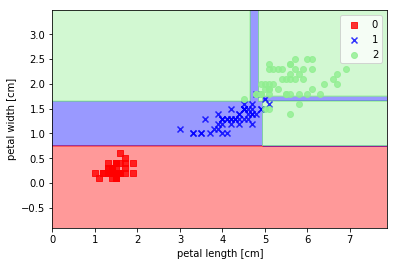

In [4]:
# 決定曲線をプロット
plot_decision_regions(X_1, y_1, tree_1)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.show()

In [5]:
# 精度の確認
print('train: {:.3f}'.format(tree_1.score(X_1_train, y_1_train)))
print('test : {:.3f}'.format(tree_1.score(X_1_test, y_1_test)))

train: 0.990
test : 0.956


In [6]:
# .dotファイルをエクスポート
from sklearn.tree import export_graphviz
export_graphviz(tree_1, out_file='tree_1.dot', feature_names=['petal length', 'petal width'],
               class_names=['setosa', 'versicolour', 'virsinica'], impurity=False, filled=True)

TypeError: Image data cannot be converted to float

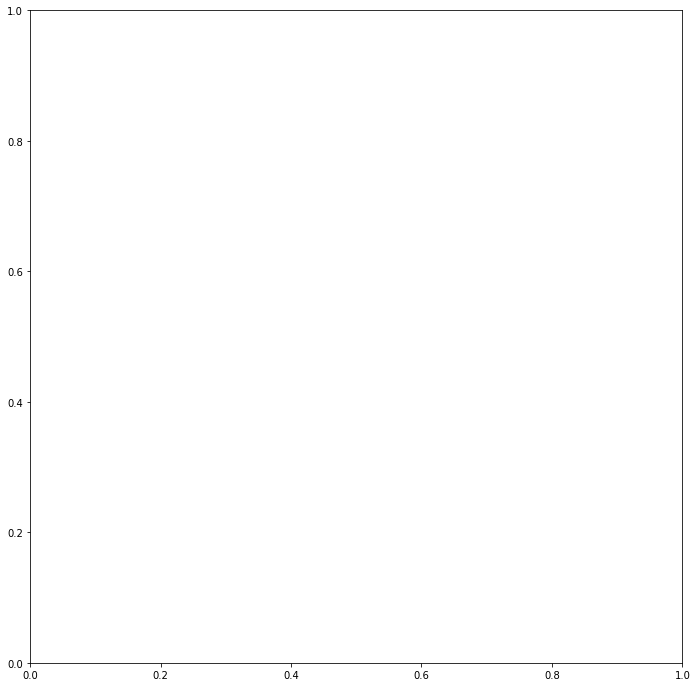

In [7]:
# 木構造を画像として出力
import cv2
img = cv2.imread('tree_1.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.show()